In [1]:
from collections import OrderedDict

In [2]:
def partial(params):
    grads = OrderedDict()
    grads['x'] = params['x'] / 10
    grads['y'] = params['y'] * 2
    return grads

In [3]:
def run(optimizer, init, n=50):
    params = init.copy()
    
    xs, ys = [], []
    xs.append(params['x'])
    ys.append(params['y'])
    
    for i in range(n):
        optimizer.update(params, partial(params))
        xs.append(params['x'])
        ys.append(params['y'])
        
    return xs, ys

In [4]:
def plot(xs, ys):
    n = 1000
    x = np.linspace(-10, 10, n)
    y = np.linspace(-10, 10, n)

    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X**2 / 20 + Y**2)

    plt.contour(X, Y, Z, levels=np.arange(0, 5, 0.7))
    plt.plot(xs, ys, 'o-')

In [5]:
update_mpl_setting()
plt.style.use("default")

In [6]:
init = OrderedDict([('x', -6.0), ('y', 6.0)])

## SGD

In [7]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

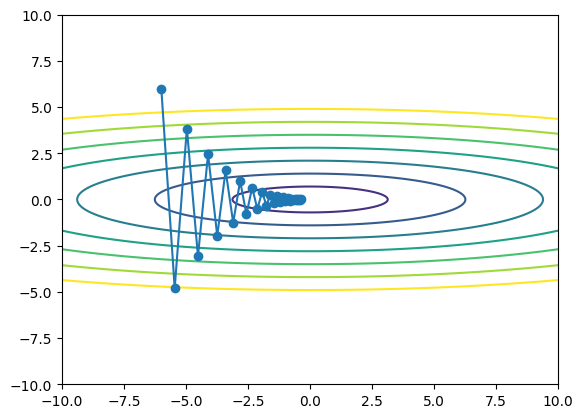

In [8]:
optimizer = SGD(lr=0.9)
xs, ys = run(optimizer, init, n=30)
plot(xs, ys)

## Momentum

In [9]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

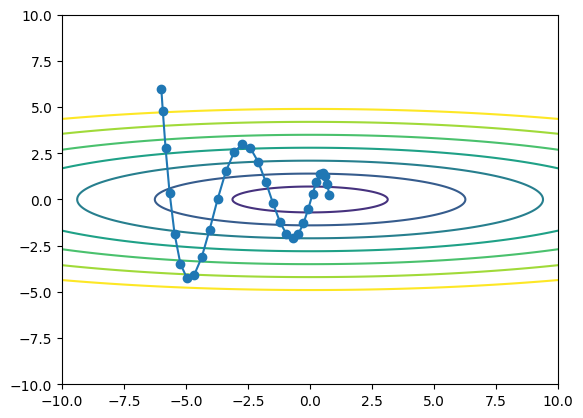

In [10]:
optimizer = Momentum(lr=0.1)
xs, ys = run(optimizer, init, n=30)
plot(xs, ys)

## AdaGrad

In [11]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

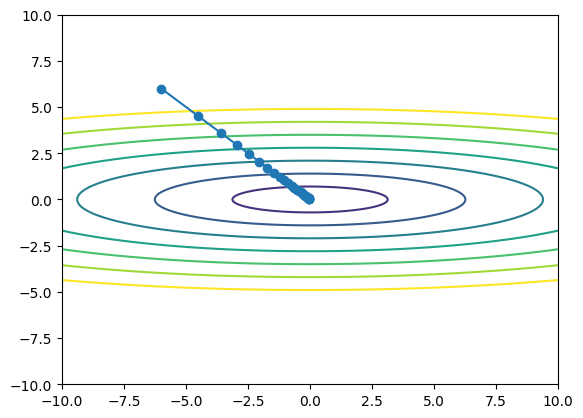

In [12]:
optimizer = AdaGrad(lr=1.5)
xs, ys = run(optimizer, init, n=30)
plot(xs, ys)

## Adam

In [13]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

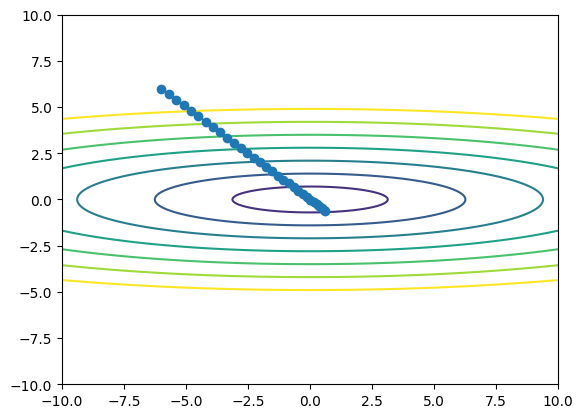

In [14]:
optimizer = Adam(lr=0.3)
xs, ys = run(optimizer, init, n=30)
plot(xs, ys)